### Q1 
#### 1-1)  Convert the image from RGB to gray, using a standard RGB-intensity conversion approach like NTSC, and store the converted image “LennaGray.jpg” as an 8-bit gray image. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from PIL import Image

(256, 256)


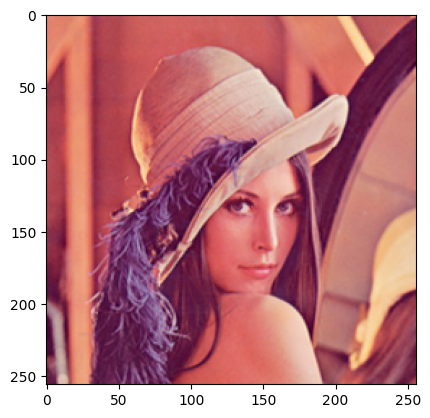

In [3]:
img = Image.open("Lenna.jpg")
plt.imshow(img)
print(img.size)

In [4]:
img_np = np.array(img)
print(img_np.shape)
#print(img_np)


(256, 256, 3)


In [5]:
lenna_gray = img.convert('L', matrix=(0.299, 0.587, 0.114, 0))
lenna_gray_np = np.array(lenna_gray)
print(lenna_gray_np.shape)

(256, 256)


In [6]:
# Save the grayscale image
lenna_gray.save('LennaGray.jpg')

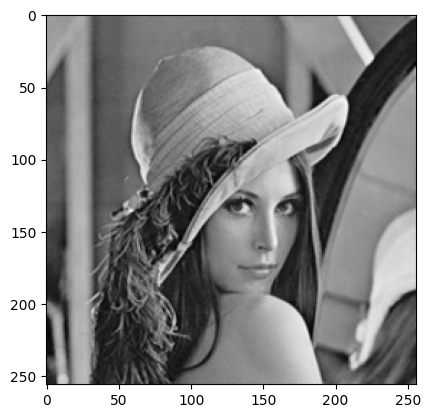

In [7]:
plt.imshow(lenna_gray, cmap='gray')

In [8]:
print(lenna_gray_np)

[[162 161 161 ... 171 169 145]
 [162 160 160 ... 177 176 153]
 [163 160 160 ... 155 140 112]
 ...
 [ 50  51  52 ...  82  93  93]
 [ 46  50  50 ...  93 100 100]
 [ 45  51  50 ...  98 104 107]]


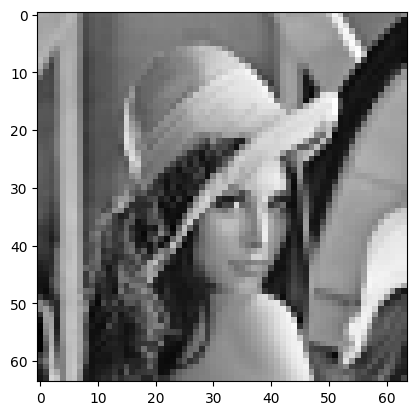

In [9]:
downsampled = lenna_gray.resize((64, 64), resample=Image.BOX)
plt.imshow(downsampled, cmap='gray')

In [10]:
downsampled.save('downsampled_gray.jpg')

(254, 254)


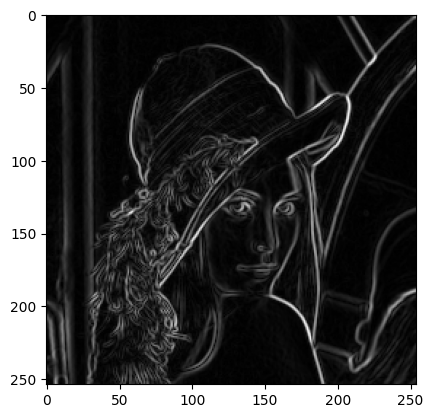

In [11]:
img = Image.open("Lenna.jpg")
width, height = img.size

gray_pixels = lenna_gray_np

sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

gx = np.zeros((height-2, width-2))
#print(gx.shape)
gy = np.zeros((height-2, width-2))

for y in range(1, height-1):
    for x in range(1, width-1):
        gx[y-1, x-1] = np.sum(sobel_x * gray_pixels[y-1:y+2, x-1:x+2])
        gy[y-1, x-1] = np.sum(sobel_y * gray_pixels[y-1:y+2, x-1:x+2])

grad_mag = np.sqrt(gx**2 + gy**2)
print(grad_mag.shape)

# Normalize the gradient magnitude to 8-bit range
grad_mag *= 255.0 / np.max(grad_mag)
mag = np.round(grad_mag).astype(np.uint8)

# Save the result
lenna_edges = Image.fromarray(mag)
plt.imshow(lenna_edges, cmap='gray')
lenna_edges.save('lenna_edges.png')

### Q2

(256,)
(257,)


Text(0.5, 1.0, 'Histogram Distribution')

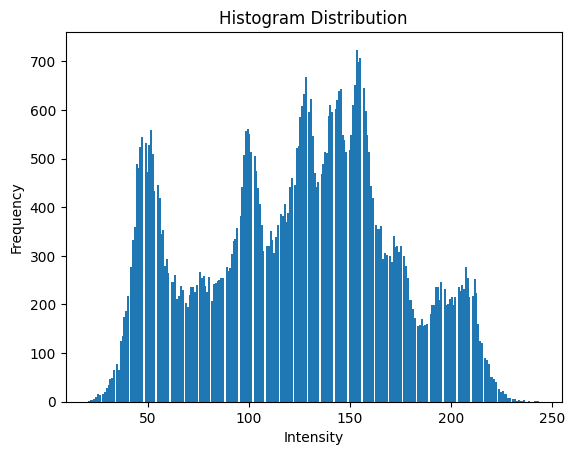

In [12]:
hist,bins = np.histogram(lenna_gray,256)
print(hist.shape)
print(bins.shape)
plt.bar(bins[:-1],hist, width=1)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Histogram Distribution')


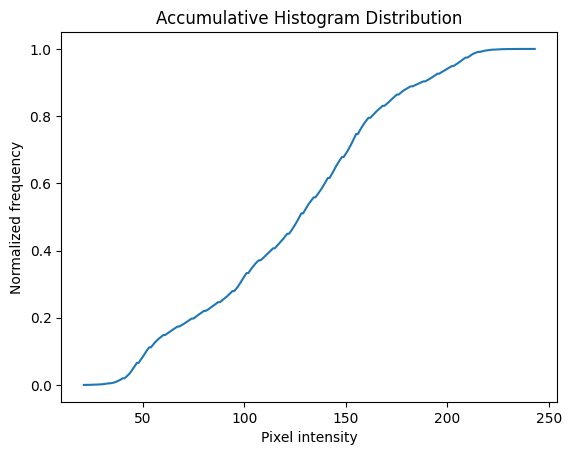

In [13]:
# Accumulative Histogram Distribution
cum_hist = np.cumsum(hist)

accum_hist = cum_hist / float(np.sum(hist))

# Plot the accumulative histogram distribution
plt.plot(bins[:-1], accum_hist)
plt.xlabel('Pixel intensity')
plt.ylabel('Normalized frequency')
plt.title('Accumulative Histogram Distribution')
plt.show()

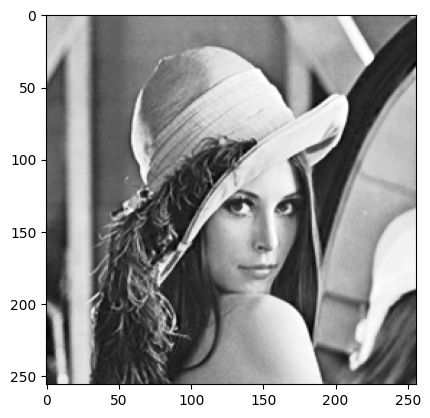

In [14]:
# Histogram equalization
# histogram_array = np.bincount(lenna_gray_np.flatten(), minlength=256)
# num_pixels = np.sum(histogram_array)
# histogram_array = histogram_array/num_pixels
# chistogram_array = np.cumsum(histogram_array)
#plt.plot(chistogram_array)
transform_map = np.floor(255 * accum_hist).astype(np.uint8)
img_list = list(lenna_gray_np.flatten())
eq_img_list = [transform_map[p] for p in img_list]
eq_img_array = np.reshape(np.asarray(eq_img_list), lenna_gray_np.shape)
eq_img = Image.fromarray(eq_img_array, mode='L')
plt.imshow(eq_img, cmap='gray')


Text(0.5, 1.0, 'Histogram Distribution with Equalization')

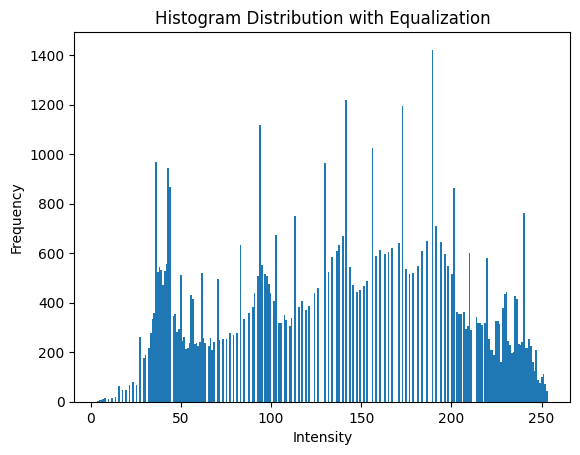

In [15]:
hist,bins = np.histogram(eq_img,256)
plt.bar(bins[:-1],hist, width=1)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Histogram Distribution with Equalization')

### Q3

(480, 320)


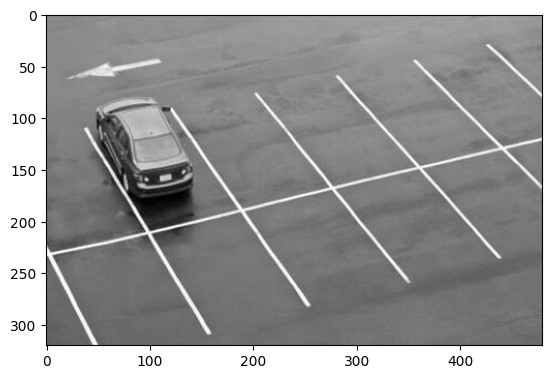

In [16]:
img = Image.open("ParkingLot.jpg")
plt.imshow(img, cmap='gray')
print(img.size)

Text(0.5, 1.0, 'Histogram Distribution')

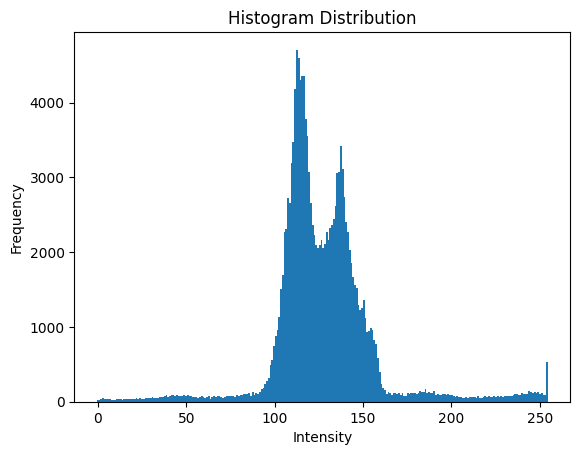

In [17]:
# Histogram Analysis
width, height = img.size
hist,bins = np.histogram(img,256)
plt.bar(bins[:-1],hist, width=1)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Histogram Distribution')

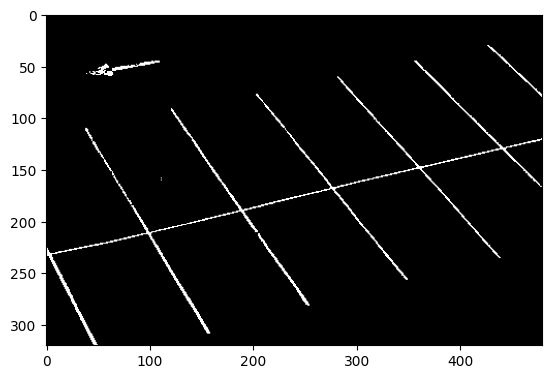

In [18]:
t = 220
img_np = np.array(img)
binary_mask = img_np > t

fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap="gray")

(1155, 2880)


(-0.5, 2879.5, 1154.5, -0.5)

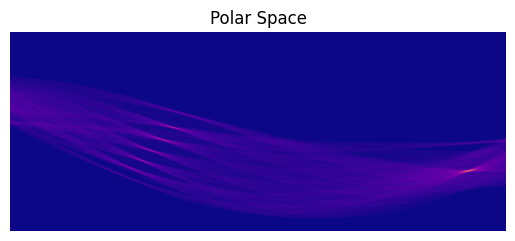

In [133]:
import cv2
from skimage.transform import (hough_line, hough_line_peaks)

img = cv2.imread('binary.jpg',0)
#plt.imshow(img, cmap='gray')
tested_angles = np.linspace(-np.pi/2, np.pi/2, 360*8)

hspace, theta, dist = hough_line(img, tested_angles)
print(hspace.shape)
#plt.figure(figsize=(,10))
#plt.imshow(hspace, cmap=plt.cm.Blues)
plt.imshow(hspace, cmap='plasma')

#plt.grid()
plt.xlabel('theta [deg]')
plt.ylabel('R')
plt.title('Polar Space')
plt.axis('off')

480


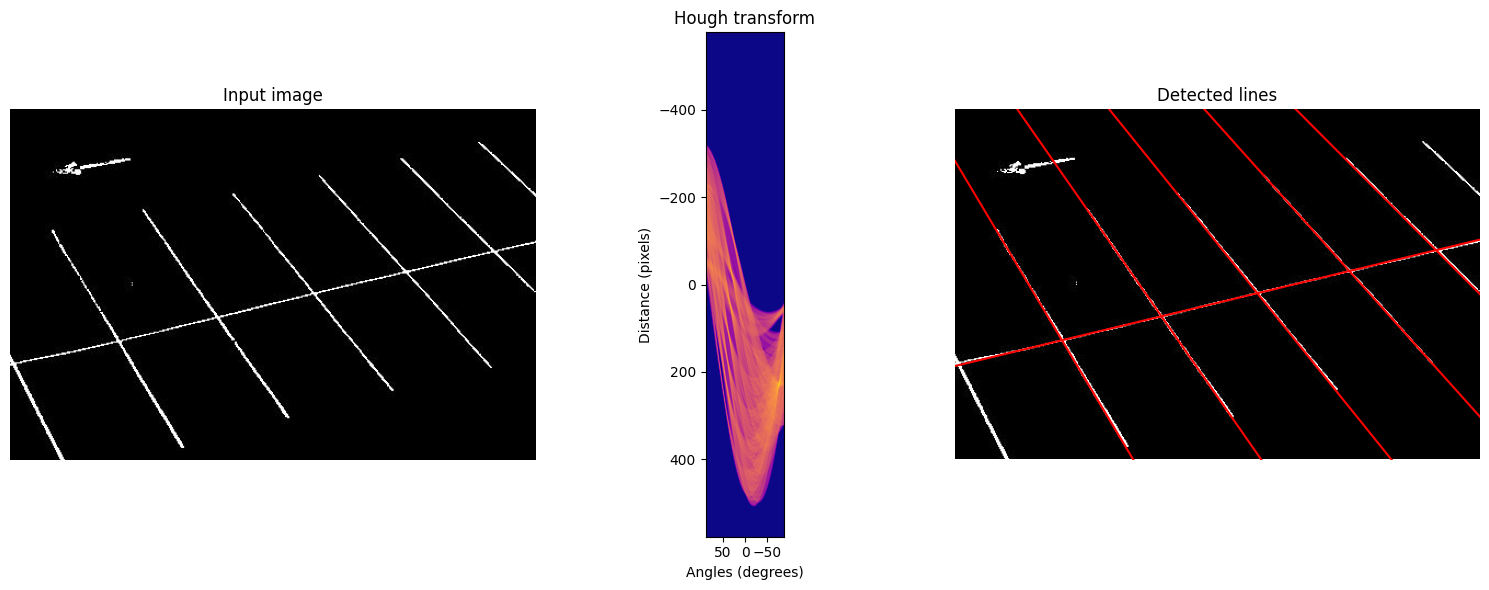

[76.46239554317548, -34.84679665738162, -41.866295264623965, -30.83565459610029, -38.857938718662965, -44.874651810584965]
[228.0, 47.0, 170.0, -24.0, 110.0, 221.0]


In [99]:
# h,q,d = hough_line_peaks(hspace, theta, dist,threshold=100)
# print(h)
# print(d)
# print(q)
hspace, theta, dist = hough_line(img, tested_angles)
angle_list=[]  #Create an empty list to capture all angles
dist_list = []

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(img, cmap='gray')
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(np.log(1 + hspace),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), dist[-1], dist[0]],
             cmap='plasma', aspect=3/1)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(img, cmap='gray')

origin = np.array((0, img.shape[1]))
print(img.shape[1])
y = []
for _, angle, dist in zip(*hough_line_peaks(hspace, theta, dist, threshold=120)):
    angle_list.append(angle) 
    dist_list.append(dist)
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    ax[2].plot(origin, (y0, y1), '-r')
    y.append([y0,y1])
ax[2].set_xlim(origin)
ax[2].set_ylim((img.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

plt.tight_layout()
plt.show()

angles = [a*180/np.pi for a in angle_list]
print(angles)
print(dist_list)

[[234.51566703181248, 118.9446178648847], [-82.25640799777337, 607.1708536939745], [-254.72187214028065, 280.8803884438574], [46.82220723621078, 850.8916297292361], [-175.3290999479273, 420.4358138693445], [-313.22720557502885, 168.87763168883163]]
(320, 480, 3)
[  0 480]
[array([  0, 480]), array([  0, 480]), array([  0, 480]), array([  0, 480]), array([  0, 480]), array([  0, 480])]


(0.0, 480.0)

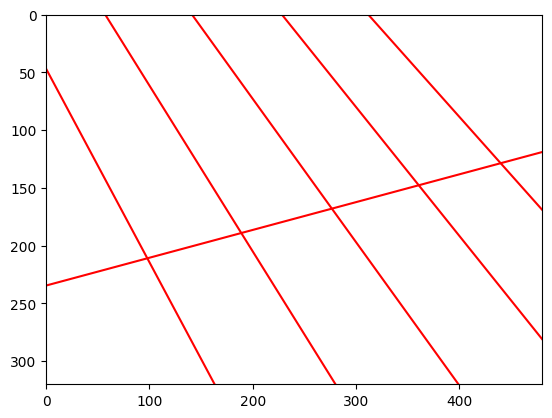

In [21]:
print(y)
image = cv2.imread('ParkingLot.jpg')
print(image.shape)
print(origin)
x = []
x = [origin for i in range(len(y))]
#plt.imshow(image)
print(x)
#plt.ylim(-320,0)
for i in range(len(y)):
    plt.plot(x[i],y[i],'-r')
plt.ylim(image.shape[0],0)
plt.xlim(0,image.shape[1])

#### Q3-4)

[ 41 223 190 189]
21
21
[190.22240337870252, 41.554556411689255, 162.6342392502688, 139.61671738236734, 37.04434216069952, 167.36818557300882, 30.7732742860599, 261.7177860309471, 130.43712115734198, 273.01134791508076, 132.58093784737557, 88.25250049014943, 222.26053971510748, 88.38834764831844, 87.68124086713189, 253.93479941304062, 127.46229508196721, 31.454046265692035, 29.747288393377147, 236.61899514646632, 35.69880565969278]
[1.5653018765916802, -0.6291265373941796, -0.936034071694634, -0.23639234838162468, -0.4398425828157362, -0.9482620009190783, -0.46951264438942975, 0.7509290623979403, -0.8250044804020341, 0.8728935041998396, -0.8280263522695347, -0.4482444627141223, 1.3841530407361171, -0.7853981633974483, -0.7853981633974483, 0.6823165548747481, -0.8248208831947745, -0.4250992212652435, -0.6925484986748982, 0.3124915597345191, -0.43698726062620824]


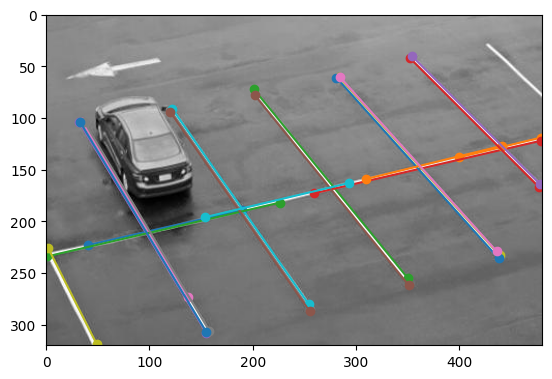

In [130]:
img = cv2.imread('binary.jpg', cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(img,100,200 , 1, 7)
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength=30,maxLineGap=30)

import math

cdst = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
print(lines[0][0])
print(len(lines))
plt.imshow(image,'gray')
plt.ylim(image.shape[0],0)
plt.xlim(0,image.shape[1])
line_list = []
if lines is not None:
    if lines is not None:
        for i in range(0, len(lines)):
            l = lines[i][0]
            #print(l)
            cv2.line(cdst, (l[0], l[1]), (l[2], l[3]), (0,255,255), 3, cv2.LINE_AA)
            plt.plot([l[0],l[2]],[l[1],l[3]],'o-')
            line = [[l[0],l[2]],[l[1],l[3]]]
            line_list.append(line)
#plt.plot(line_list[0][0],line_list[0][1],'g*--')
# plt.plot(line_list[11][0],line_list[11][1],'g*--')
# plt.plot(line_list[13][0],line_list[13][1],'b*--')

print(len(line_list))
line_list_filtered = []

def perpendicular_distance(x1, y1, x2, y2):
    numerator = abs((x2 - x1) * y1 - (y2 - y1) * x1)
    denominator = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    distance = numerator / denominator
    return distance

def perpendicular_theta(x1,y1,x2,y2):
    slope = (y2-y1)/(x2-x1)
    slope_p = -1/slope
    theta = math.atan(slope_p)
    return theta

r_lines = []
th_lines = []
for i in range(len(line_list)):
    x1 = line_list[i][0][0]
    y1 = line_list[i][0][1]
    x2 = line_list[i][1][0]
    y2 = line_list[i][1][1]
    th = perpendicular_theta(x1,y1,x2,y2)
    r = perpendicular_distance(x1,y1,x2,y2)
    r_lines.append(r)
    th_lines.append(th)

print(r_lines)
print(th_lines)

# for i in range(len(line_list)):
#     lin = line_list[i]
#     for j in range(len(line_list)):
#         if i!=j:

